# Automobile Data set
*source : https://rpubs.com/Arnav_Jain/DSP_AutomobileDatasetAnalysis#:~:text=The%20second%20attribute%2C%20“normalized-,loss%20per%20vehicle%20per%20year.*

##### The dataset describes used automobiles in 3 ways:

- The technical specification of the automobile

- The loss per vehicle per year given as “normalized-losses”

- The insurance risk rating of the automobile given as “symboling”

“symboling”, corresponds to a car’s insurance risk level. Cars are initially assigned a risk factor symbol that corresponds to their price. If an automobile is more dangerous, this symbol is adjusted by increasing it. A value of +3 indicates that the vehicle is risky, while -3 indicates that it is likely safe to insure.

The second attribute, “normalized-losses,” is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.

In [636]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the automobile dataset 

In [637]:
automobile_df = pd.read_csv('automobile.txt')

## Evaluating data

In [638]:
# Data sample
automobile_df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [639]:
# Checking data types
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [640]:
def null_data_check(dataframe):
    '''Used for checking data frame for nulls.'''
    # Checking for nulls
    # get the number of missing data points per column
    missing_values_count = dataframe.isnull().sum()

    num_col = dataframe.shape[1]
    # look at the # of missing points in the columns
    print(missing_values_count[0:num_col])

In [641]:
null_data_check(automobile_df)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Data Cleansing
#### Clean the data

Remove the following columns `['normalized-losses','num-of-doors','wheel-base','length','width','height','curb-weight','engine-type','fuel-system','bore','stroke','compression-ratio','engine-size','num-of-cylinders']` from the data set as they will not be used in the analysis.

In [642]:
cols_to_drop = ['normalized-losses','num-of-doors','wheel-base','length','width','height','curb-weight','engine-type','fuel-system','bore','stroke','compression-ratio','engine-size','num-of-cylinders']

# Checks if the columns to drop can be found in the automobile_df 
if any(col in automobile_df.columns for col in cols_to_drop):
    automobile_df.drop(columns=cols_to_drop,inplace=True)
automobile_df

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,convertible,rwd,front,111,5000,21,27,13495
1,3,alfa-romero,gas,std,convertible,rwd,front,111,5000,21,27,16500
2,1,alfa-romero,gas,std,hatchback,rwd,front,154,5000,19,26,16500
3,2,audi,gas,std,sedan,fwd,front,102,5500,24,30,13950
4,2,audi,gas,std,sedan,4wd,front,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,114,5400,23,28,16845
201,-1,volvo,gas,turbo,sedan,rwd,front,160,5300,19,25,19045
202,-1,volvo,gas,std,sedan,rwd,front,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,sedan,rwd,front,106,4800,26,27,22470


##### Remove Null data
- Null data was first represented as with '?'
- Convertion of the '?' character to null 
- removal of null data

In [643]:
# replacing all the missing data that has been denoted with a '?' to null
automobile_df.replace('?',np.nan,inplace=True)
null_data_check(automobile_df)

automobile_df = automobile_df.dropna()
null_data_check(automobile_df)


symboling          0
make               0
fuel-type          0
aspiration         0
body-style         0
drive-wheels       0
engine-location    0
horsepower         2
peak-rpm           2
city-mpg           0
highway-mpg        0
price              4
dtype: int64
symboling          0
make               0
fuel-type          0
aspiration         0
body-style         0
drive-wheels       0
engine-location    0
horsepower         0
peak-rpm           0
city-mpg           0
highway-mpg        0
price              0
dtype: int64


#### Change data types
- Change the horsepower data type from object to Int64, this will help with analysis and grouping of the horsepower for further evaluation. 

In [644]:
automobile_df.loc[:, 'horsepower'] = automobile_df['horsepower'].fillna(0).astype('Int64')

# Checking the conversion
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   symboling        199 non-null    int64 
 1   make             199 non-null    object
 2   fuel-type        199 non-null    object
 3   aspiration       199 non-null    object
 4   body-style       199 non-null    object
 5   drive-wheels     199 non-null    object
 6   engine-location  199 non-null    object
 7   horsepower       199 non-null    object
 8   peak-rpm         199 non-null    object
 9   city-mpg         199 non-null    int64 
 10  highway-mpg      199 non-null    int64 
 11  price            199 non-null    object
dtypes: int64(3), object(9)
memory usage: 20.2+ KB


### Exploration

##### Checking for series of unique values
- Further evaluation of data observation of uniquie series of data.

In [645]:
col_list = ['symboling','fuel-type','aspiration','body-style','drive-wheels','engine-location']
for col in col_list:
    print(f'{col} :{automobile_df[col].unique()}')

symboling :[ 3  1  2  0 -1 -2]
fuel-type :['gas' 'diesel']
aspiration :['std' 'turbo']
body-style :['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels :['rwd' 'fwd' '4wd']
engine-location :['front' 'rear']


##### What are the 5 most expensive car brands

In [646]:
automobile_df.sort_values(by='price', ascending=False).head(5)

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,horsepower,peak-rpm,city-mpg,highway-mpg,price
188,2,volkswagen,gas,std,sedan,fwd,front,100,5500,26,32,9995
169,2,toyota,gas,std,hatchback,rwd,front,116,4800,24,30,9989
175,-1,toyota,gas,std,hatchback,fwd,front,92,4200,27,32,9988
190,3,volkswagen,gas,std,hatchback,fwd,front,90,5500,24,29,9980
143,0,subaru,gas,std,sedan,fwd,front,94,5200,26,32,9960


##### What are the 5 cheapest cars 

In [647]:
automobile_df.sort_values(by='price', ascending=True).head(5)

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,horsepower,peak-rpm,city-mpg,highway-mpg,price
147,0,subaru,gas,std,wagon,fwd,front,94,5200,25,31,10198
62,0,mazda,gas,std,sedan,fwd,front,84,4800,26,32,10245
40,0,honda,gas,std,sedan,fwd,front,86,5800,27,33,10295
42,1,honda,gas,std,sedan,fwd,front,100,5500,25,31,10345
61,1,mazda,gas,std,hatchback,fwd,front,84,4800,26,32,10595


#### No. of cars per symboling group

In [648]:
grouped_sym_make = automobile_df.groupby('symboling')['symboling'].count()
print(grouped_sym_make)


symboling
-2     3
-1    22
 0    64
 1    52
 2    31
 3    27
Name: symboling, dtype: int64


#### Make with the highest horsepower

In [649]:
automobile_df.loc[automobile_df['horsepower'].idxmax()]


symboling               0
make               jaguar
fuel-type             gas
aspiration            std
body-style          sedan
drive-wheels          rwd
engine-location     front
horsepower            262
peak-rpm             5000
city-mpg               13
highway-mpg            17
price               36000
Name: 49, dtype: object

#### Make with the lowest horsepower

In [650]:
automobile_df.loc[automobile_df['horsepower'].idxmin()]

symboling                  2
make               chevrolet
fuel-type                gas
aspiration               std
body-style         hatchback
drive-wheels             fwd
engine-location        front
horsepower                48
peak-rpm                5100
city-mpg                  47
highway-mpg               53
price                   5151
Name: 18, dtype: object

#### Make with the highest price

In [651]:
automobile_df.loc[automobile_df['price'].idxmax()]

symboling                   2
make               volkswagen
fuel-type                 gas
aspiration                std
body-style              sedan
drive-wheels              fwd
engine-location         front
horsepower                100
peak-rpm                 5500
city-mpg                   26
highway-mpg                32
price                    9995
Name: 188, dtype: object

In [652]:
automobile_df.loc[automobile_df['price'].idxmin()]

symboling               0
make               subaru
fuel-type             gas
aspiration            std
body-style          wagon
drive-wheels          fwd
engine-location     front
horsepower             94
peak-rpm             5200
city-mpg               25
highway-mpg            31
price               10198
Name: 147, dtype: object

In [653]:
automobile_df.groupby('body-style')['symboling'].unique()

body-style
convertible               [3, 2]
hardtop             [0, 1, 2, 3]
hatchback       [1, 2, 3, 0, -1]
sedan          [2, 1, 0, -1, -2]
wagon                 [1, -1, 0]
Name: symboling, dtype: object

#### Adding horsepower grouping
- This will be used to explore the data in a clearer manner when evaluating horsepower against risk.

In [654]:
# Define labels for the age groups
labels = ['48-84','85-120','121-156','157-192','193-228','229-264']

# Create a new column 'Age_Group' by grouping ages into bins
automobile_df['horsepower-group'] = pd.cut(automobile_df['horsepower'], bins=6, labels=labels, right=False)
automobile_df.sort_values(by='horsepower-group',ascending=False)

C:\Users\sheen\AppData\Local\Temp\ipykernel_35852\4286875101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  automobile_df['horsepower-group'] = pd.cut(automobile_df['horsepower'], bins=6, labels=labels, right=False)


,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-group
49,0,jaguar,gas,std,sedan,rwd,front,262,5000,13,17,36000,229-264
105,3,nissan,gas,turbo,hatchback,rwd,front,200,5200,17,23,19699,193-228
128,3,porsche,gas,std,convertible,rwd,rear,207,5900,17,25,37028,193-228
127,3,porsche,gas,std,hardtop,rwd,rear,207,5900,17,25,34028,193-228
126,3,porsche,gas,std,hardtop,rwd,rear,207,5900,17,25,32528,193-228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,nissan,gas,std,hardtop,fwd,front,69,5200,31,37,8249,48-84
153,0,toyota,gas,std,wagon,fwd,front,62,4800,31,37,6918,48-84
152,1,toyota,gas,std,hatchback,fwd,front,62,4800,31,38,6488,48-84
151,1,toyota,gas,std,hatchback,fwd,front,62,4800,31,38,6338,48-84


### Data Visualization and Analysis

#### Risk vs Make
- Examining the relationship between risk and make to display each brands risk rating.

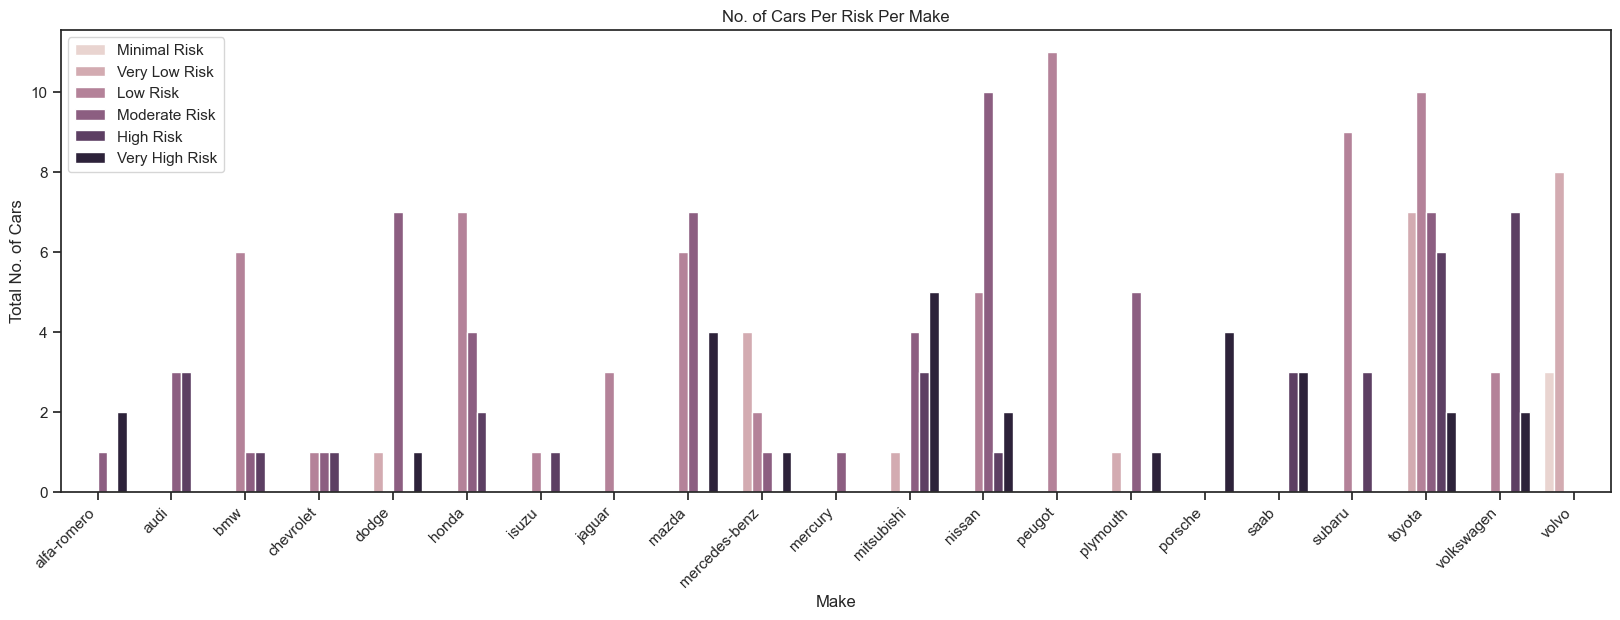

In [655]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
sns.countplot(x='make',hue='symboling', data=automobile_df)

plt.xlabel("Make")
plt.ylabel('Total No. of Cars')
plt.title("No. of Cars Per Risk Per Make")
plt.legend(labels=['Minimal Risk','Very Low Risk','Low Risk','Moderate Risk', 'High Risk','Very High Risk'])
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


This graph displays the relationship between brand and total number of cars counted and their risk factor. The more popular brands of cars have cars in most of the risk factors while the less popular car brands don't feature in across as many risk categories. It can also be noted that certain makes of cars do display what we have come to expect from them with regards to risk for example Volvo is not to be one of the safest cars. Porsche could be deemed 'Very High Risk' due to the nature of it being a sports/ performance car and speeding leads to a lot of accidents.

#### Body-style vs risk
- Examining the relationship between body-style (convertable, hatchback, sedan, wagon, hardtop) versus risk.

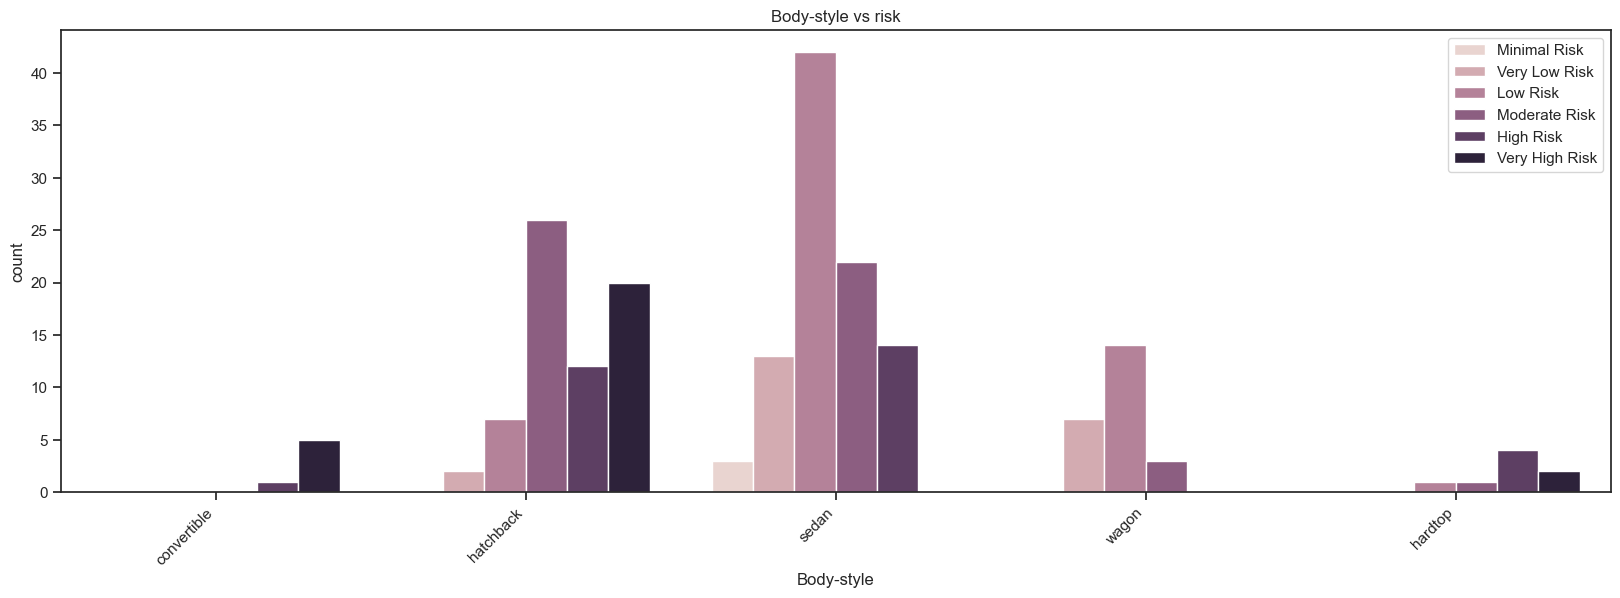

In [656]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
sns.countplot(x='body-style',hue='symboling', data=automobile_df)

plt.xlabel("Body-style")
plt.title("Body-style vs risk")
plt.legend(labels=['Minimal Risk','Very Low Risk','Low Risk','Moderate Risk', 'High Risk','Very High Risk'])
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


From the graph above it can be noted that the most popular car body style might be sedan but the highest risk body-style car is hatchback. We could deduce that most performance cars tend to be hatchbacks and with that comes speeding and reckless driving leading to more accidents. Convertibles however are also high risk but this could be due to their lack of crash protection in a rollover incident is significantly less than that of a hard-top car.

#### Horsepower vs Risk
- Examining the relationship between horsepower and risk.

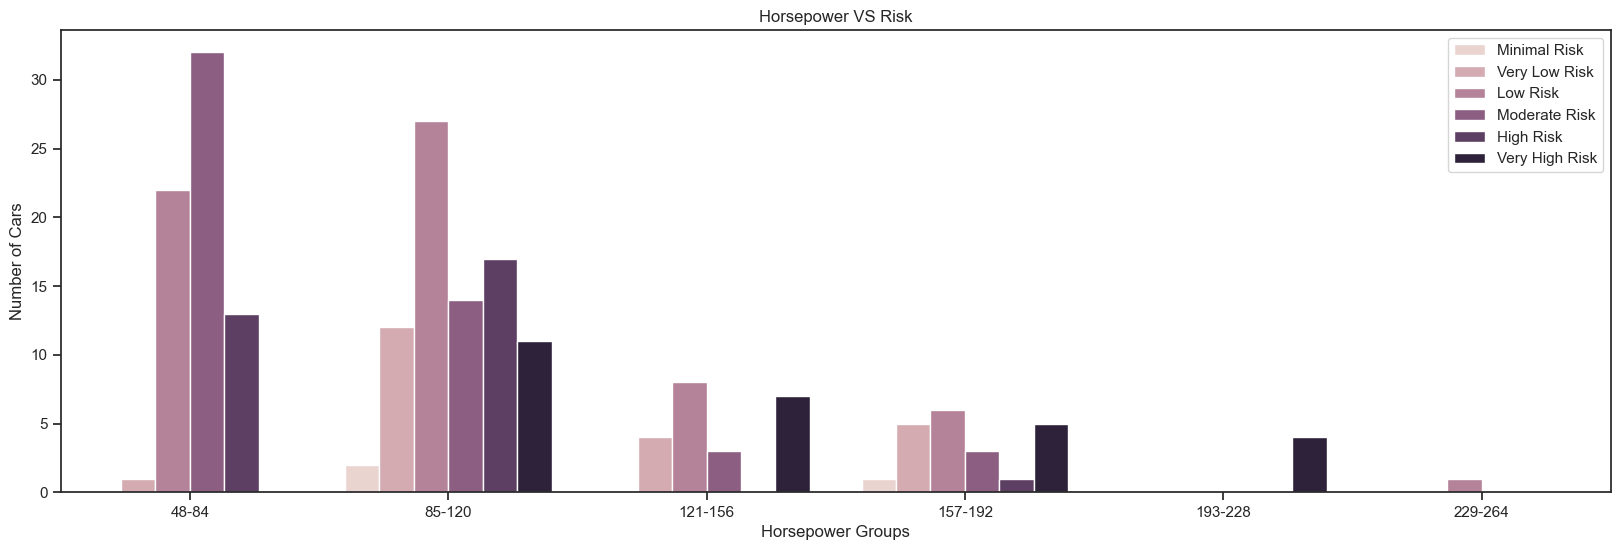

In [657]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
sns.countplot(x='horsepower-group', hue='symboling', data=automobile_df)

plt.xlabel("Horsepower Groups")
plt.ylabel("Number of Cars")
plt.title("Horsepower VS Risk")
plt.legend(labels=['Minimal Risk','Very Low Risk','Low Risk','Moderate Risk', 'High Risk','Very High Risk'])
plt.grid(False)
plt.show()

The most popular horsepower groupings are the lower horsepower groupings, we could assume that this is due to these cars being cheaper than cars of a higher horsepower. There also does not appear to be a clear relationship between horsepower and the risk factor because the grouping with the highest risk factor is 84 - 120 this is the second lowest horsepower grouping. Based on the graph you could assume that higher-risk cars are due to popularity and not horsepower

#### Fuel efficiency City
- Examining fuel efficiency based on fuel-type vs City Miles per gallon


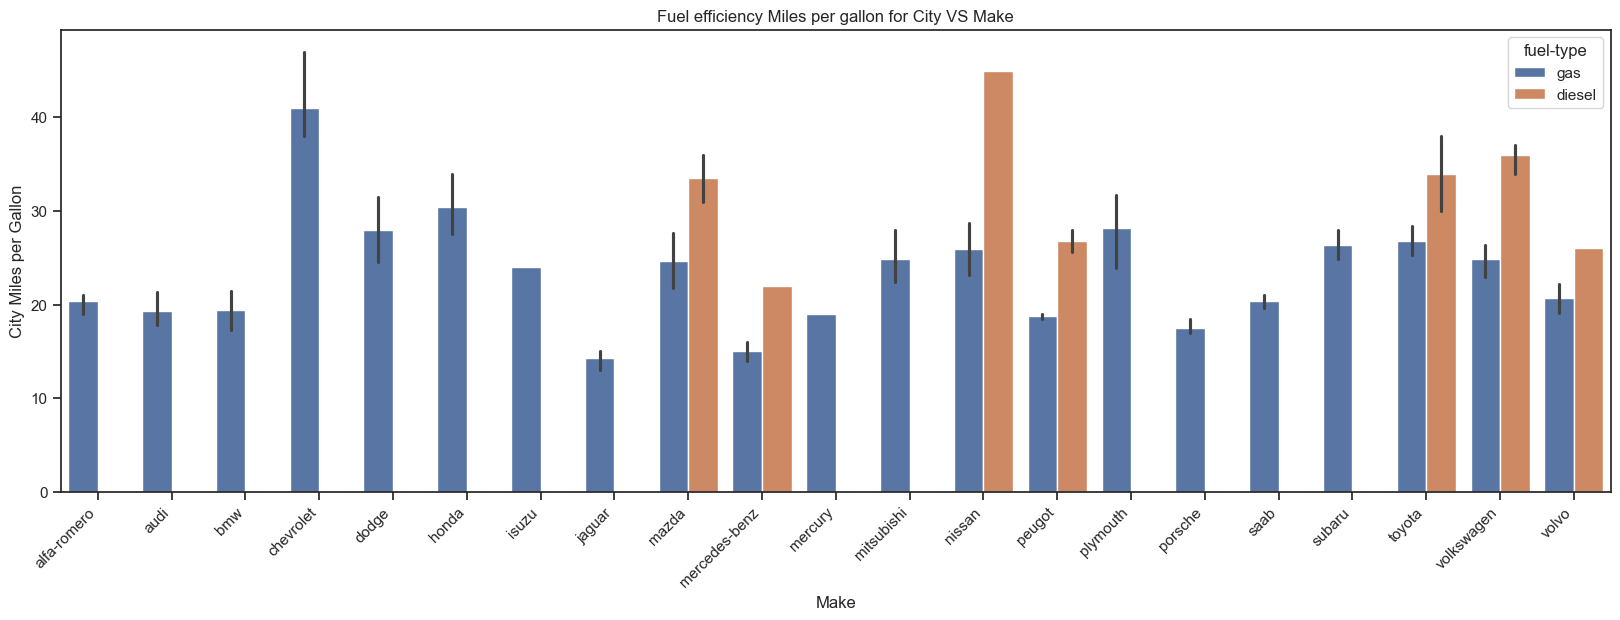

In [658]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
sns.set_theme(style="ticks")
sns.barplot(y='city-mpg',x='make', hue='fuel-type', data=automobile_df)
plt.ylabel("City Miles per Gallon")
plt.xlabel("Make")
plt.title("Fuel efficiency Miles per gallon for City VS Make")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

In the comparison between fuel efficiency of city driving versus make versus fuel type it can be not from the graph Chevrolet is the most fuel efficient gas make for city driving but diesel and the Nissan brand beats this and can be said to be the most fuel efficient option for city driving.

#### Fuel efficiency Highway
- Examining fuel efficiency based on fuel-type vs Highway Miles per gallon

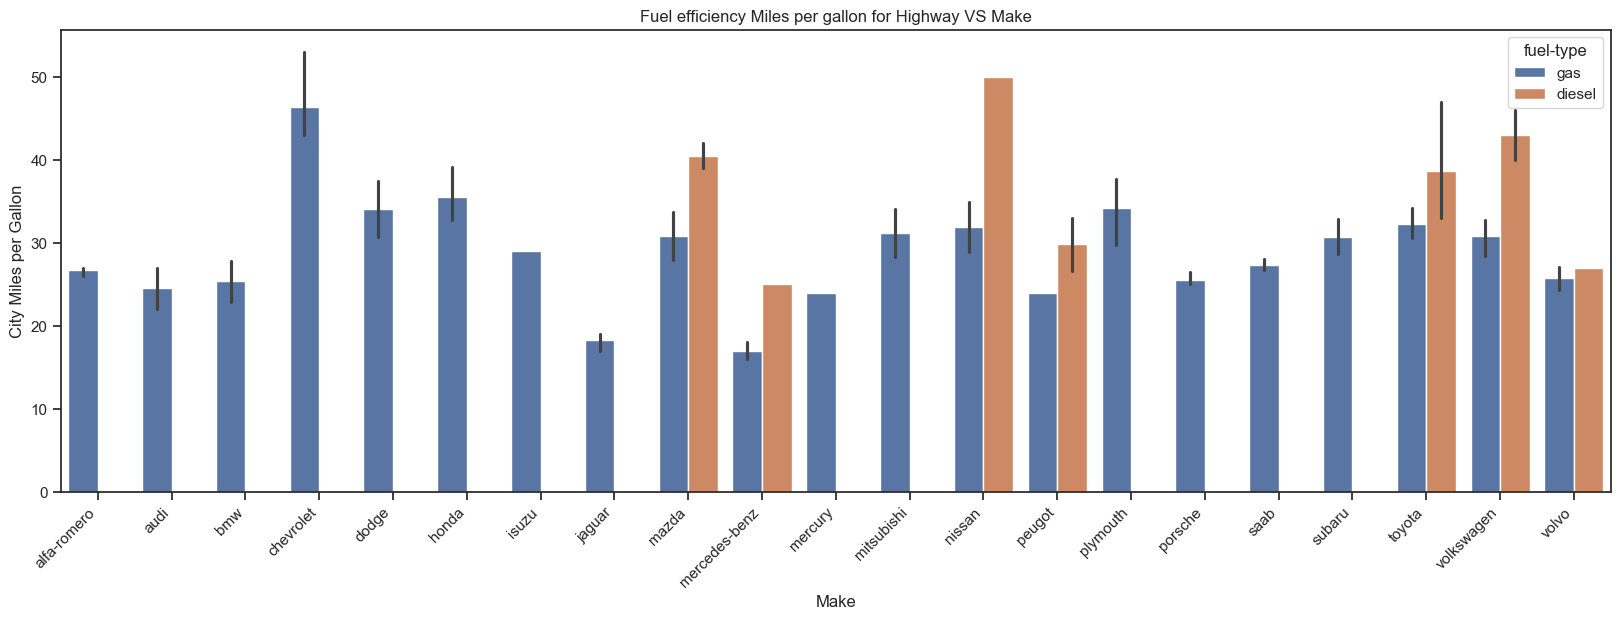

In [659]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="ticks")
sns.barplot(y='highway-mpg',x='make', hue='fuel-type', data=automobile_df)

plt.ylabel("City Miles per Gallon")
plt.xlabel("Make")
plt.title("Fuel efficiency Miles per gallon for Highway VS Make")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

Just Like the previous graph the same results can be seen to be true about fuel efficiency and highway driving in the Chevrolet would be the best choice should you want gas as your fuel type. However Nissan is still the most fuel efficient when choosing diesel as fuel type.